## 1. Introduction

This project addresses the prominent challenge of premium prediction within the health insurance industry by utilizing machine learning techniques on the [Kaggle Dataset](<https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset>). It stands out through the development of a Streamlit web app, employing object-oriented programming principles. This innovative approach guarantees straightforward maintenance, seamless database updates, and continuous enhancement of the predictive model using additional data to meet the evolving requirements of customers. The production-grade code, based on object-oriented programming, is stored in the scripts folder, while this notebook serves as the research phase to identify the superior model between linear regression and Artificial Neural Network (ANN). The insights garnered from the notebook serve as the driving force behind the creation of the web app, providing insurance companies with a reliable tool for premium prediction, streamlining operations, and adapting to the dynamic demands of the industry.

## 2. Methodology 

The project follows a specific workflow for insurance premium prediction, involving data collection, exploratory data analysis (EDA), data splitting, data preprocessing, and modeling with evaluation and interpretation. The dataset is analyzed to understand relationships and patterns, features are selected, and the data is split into training, validation, and testing sets. Preprocessing steps are applied, and two models, linear regression and an ANN, are trained, evaluated, and interpreted using the dataset. 

## 3. Development of Insurance Premium Prediction ML Model

### 3.1 Import Libraries

In [1]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Modeling and Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score

# Model Interpretability and Explanation
import shap

# Warnings
import warnings

In [2]:
warnings.filterwarnings("ignore")

### 3.2 Data Collection

The dataset containing insured data, including attributes and insurance charges, is collected as the initial step.

In [3]:
# Read the CSV file into a DataFrame
df = pd.read_csv("data/insurance.csv")

print(f"Shape of DataFrame: {df.shape}")

df.head()

Shape of DataFrame: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 3.3 Exploratory Data Analysis (EDA)

EDA is conducted to gain insights into the dataset, identify patterns, and understand the relationships between attributes and insurance charges. This analysis provides valuable information for feature selection and modeling.


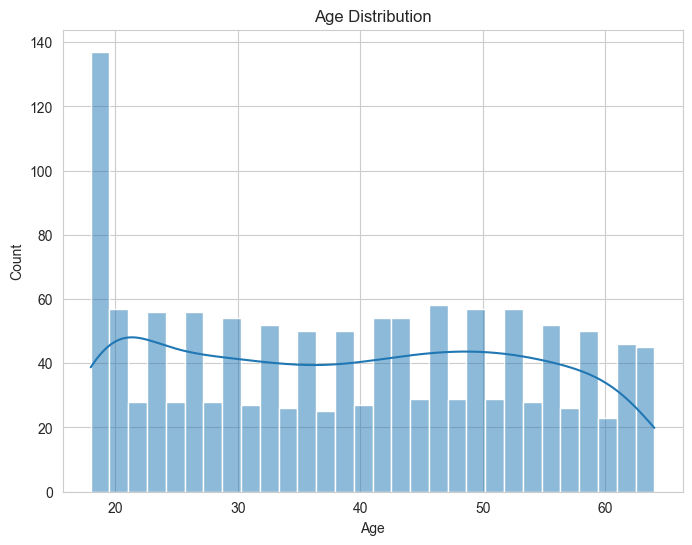

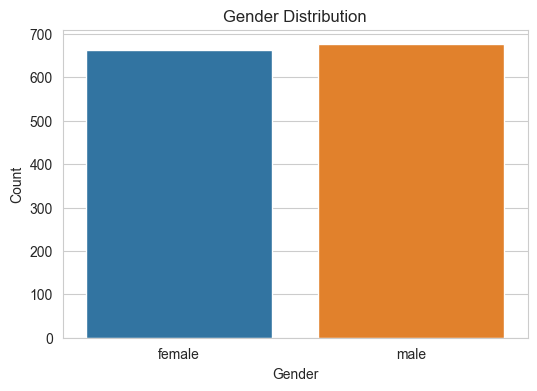

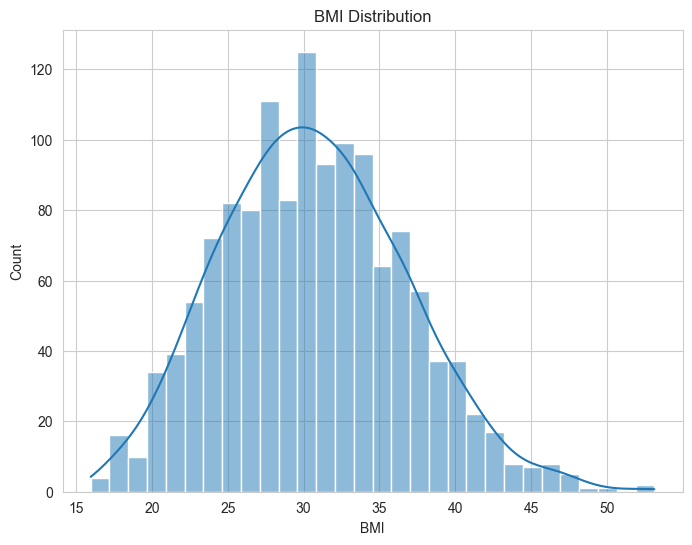

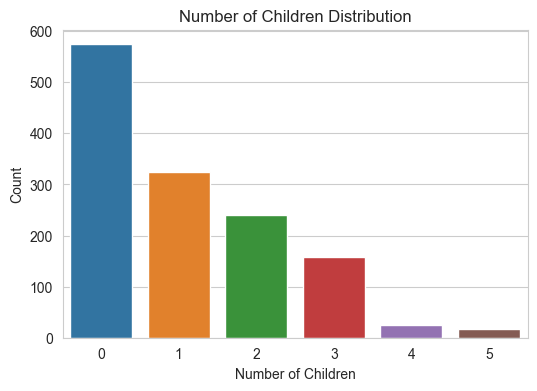

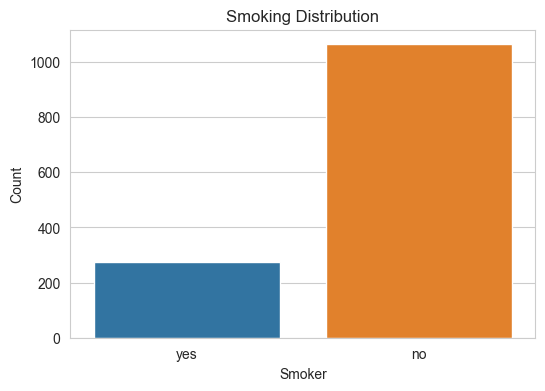

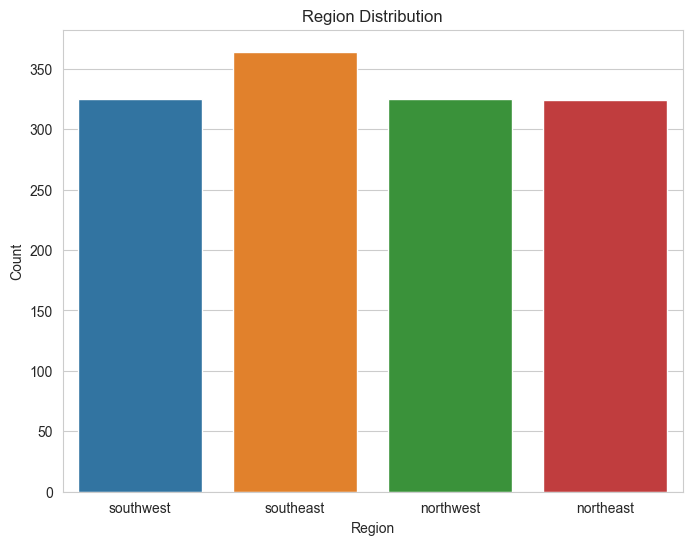

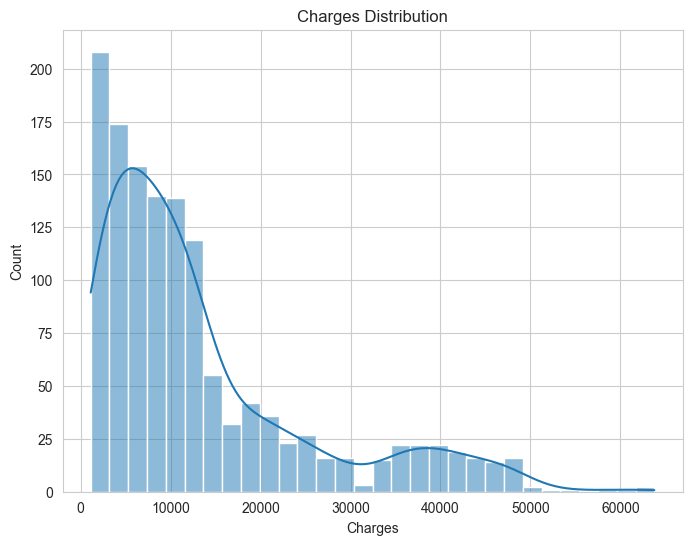

In [4]:
# Create a copy of the DataFrame for EDA
df_eda = df.copy()

# Set the style of the plots
sns.set_style("whitegrid")

# EDA - Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df_eda, x="age", bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# EDA - Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df_eda, x="sex")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# EDA - BMI Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df_eda, x="bmi", bins=30, kde=True)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

# EDA - Number of Children Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df_eda, x="children")
plt.title("Number of Children Distribution")
plt.xlabel("Number of Children")
plt.ylabel("Count")
plt.show()

# EDA - Smoking Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df_eda, x="smoker")
plt.title("Smoking Distribution")
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.show()

# EDA - Region Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df_eda, x="region")
plt.title("Region Distribution")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

# EDA - Charges Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df_eda, x="charges", bins=30, kde=True)
plt.title("Charges Distribution")
plt.xlabel("Charges")
plt.ylabel("Count")
plt.show()

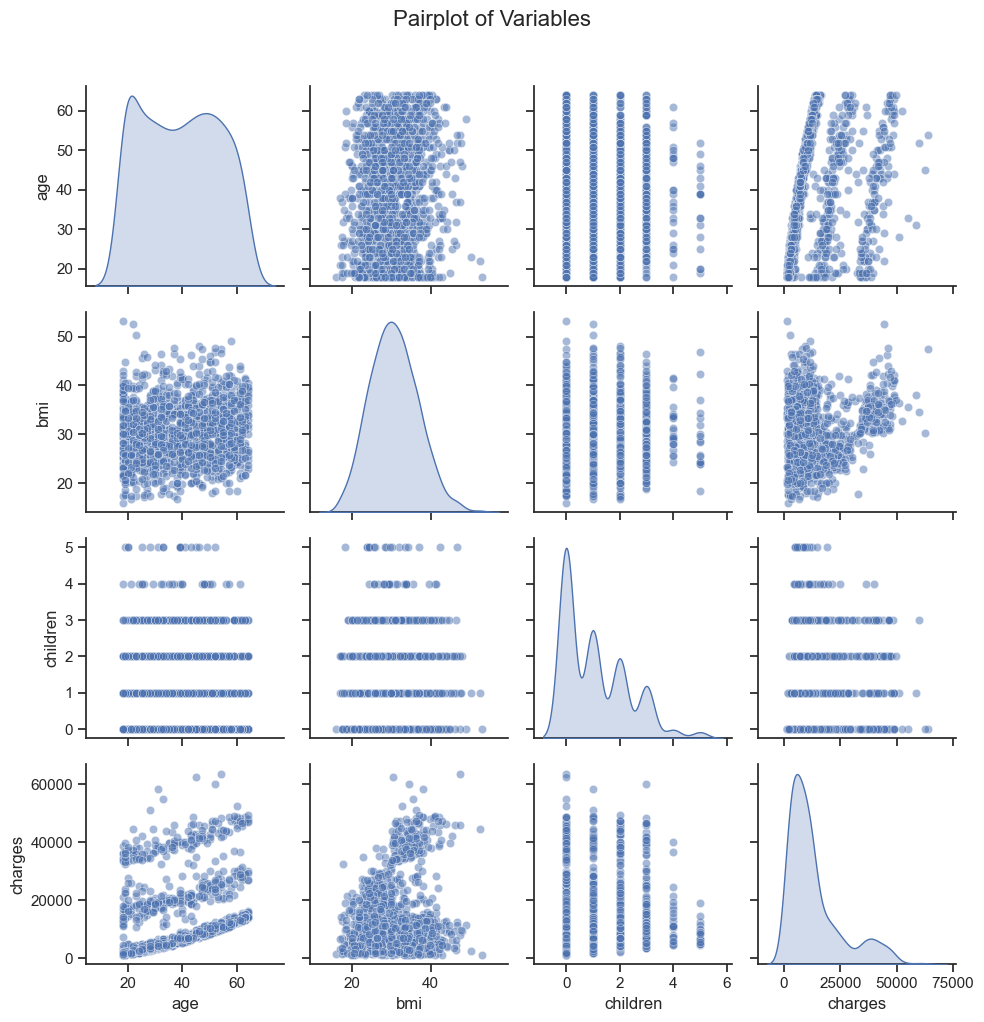

In [5]:
# Select the variables you want to include in the pairplot
variables = ["age", "bmi", "children", "charges"]

# Set the style of the plot
sns.set(style="ticks")

# Create the pairplot with customizations
sns.pairplot(df_eda[variables], diag_kind="kde", markers="o", plot_kws={"alpha": 0.5})
plt.suptitle("Pairplot of Variables", y=1.02, size=16)
plt.tight_layout()
plt.show()

### 3.4 Data Preprocessing 

Data preprocessing involves several steps, including feature engineering, encoding categorical variables, and scaling numerical features.

#### Feature Engineering

Feature engineering techniques are applied to transform and create new features from the initial dataset, enabling better representation of underlying relationships and enhancing the predictive power of the models.

In [6]:
# Define BMI categories based on BMI ranges
bmi_categories = ['underweight', 'normal weight', 'overweight', 'obese']
bmi_ranges = [0, 18.5, 25, 30, float('inf')]

# Create the BMI category feature
df['bmi_category'] = pd.cut(df['bmi'], bins=bmi_ranges, labels=bmi_categories, right=False)
# Convert the 'bmi_category' column to object data type
df['bmi_category'] = df['bmi_category'].astype('object')

df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal weight
4,32,male,28.880,0,no,northwest,3866.85520,overweight


### 3.5 Data Splitting

The preprocessed dataset is split into training, validation, and testing sets. The training set and validation set is used to train the prediction models, the testing set is used for evaluation.


In [7]:
# Set the sizes of the train, validation, and test sets
train_size = 0.70
val_size = 0.15
test_size = 1 - train_size - val_size

from sklearn.model_selection import train_test_split

# Discretize 'charges' into bins
num_bins = 20
df['charges_bins'] = pd.qcut(df['charges'], q=num_bins)

# Split the data into train, validation, and test sets
train_val_df, test_df = train_test_split(df, test_size=test_size, random_state=42, stratify=df['charges_bins'])
train_df, val_df = train_test_split(train_val_df, test_size=val_size/(train_size+val_size), random_state=42, stratify=train_val_df['charges_bins'])

# Separate the features and target variables
X_train = train_df.drop(["charges", "charges_bins"], axis=1)
y_train = train_df["charges"]

X_val = val_df.drop(["charges", "charges_bins"], axis=1)
y_val = val_df["charges"]

X_test = test_df.drop(["charges", "charges_bins"], axis=1)
y_test = test_df["charges"]

# Calculate the number of records and percentages in each split
total_records = len(df)
train_records = len(train_df)
val_records = len(val_df)
test_records = len(test_df)

train_percentage = (train_records / total_records) * 100
val_percentage = (val_records / total_records) * 100
test_percentage = (test_records / total_records) * 100

# Print the number of records and percentages in each split
print("Train Set:")
print(f"Number of records: {train_records}")
print(f"Percentage of total: {train_percentage:.0f}%\n")

print("Validation Set:")
print(f"Number of records: {val_records}")
print(f"Percentage of total: {val_percentage:.0f}%\n")

print("Test Set:")
print(f"Number of records: {test_records}")
print(f"Percentage of total: {test_percentage:.0f}%")

Train Set:
Number of records: 936
Percentage of total: 70%

Validation Set:
Number of records: 201
Percentage of total: 15%

Test Set:
Number of records: 201
Percentage of total: 15%


### 3.6 Data Preprocessing

Data preprocessing involves several steps, including feature engineering, encoding categorical variables, and scaling numerical features.

#### Feature Encoding

Categorical variables are encoded using one-hot encoding, allowing for the representation of categorical data as binary vectors and enabling machine learning algorithms to effectively utilize this information.

In [8]:
# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the categorical features in the train set
X_train_encoded = encoder.fit_transform(X_train.select_dtypes(include='object'))
encoded_cols = encoder.get_feature_names_out(X_train.select_dtypes(include='object').columns)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_cols, index=X_train.index)

# Transform the categorical features in the validation and test sets
X_val_encoded = encoder.transform(X_val.select_dtypes(include='object'))
X_test_encoded = encoder.transform(X_test.select_dtypes(include='object'))
X_val_encoded_df = pd.DataFrame(X_val_encoded, columns=encoded_cols, index=X_val.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_cols, index=X_test.index)

#### Feature Scaling

Numerical features are scaled using the standard scaler, ensuring that all numerical variables are transformed to have a mean of 0 and a standard deviation of 1. This normalization process enhances the performance of machine learning models and prevents features with larger scales from dominating the analysis.

In [9]:
# Create an instance of the MinMaxScaler
scaler = StandardScaler()

# Fit and transform the numerical features in the train set
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(exclude='object'))
scaled_cols = X_train.select_dtypes(exclude='object').columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=scaled_cols, index=X_train.index)

# Transform the numerical features in the validation and test sets
X_val_scaled = scaler.transform(X_val.select_dtypes(exclude='object'))
X_test_scaled = scaler.transform(X_test.select_dtypes(exclude='object'))
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=scaled_cols, index=X_val.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=scaled_cols, index=X_test.index)

#### Concatenate DataFrames

The encoded and scaled dataframes for the train, validation, and test sets are concatenated together, creating merged datasets that contain both the transformed categorical variables (encoded) and normalized numerical variables (scaled).

In [10]:
# Concatenate the encoded and scaled dataframes for train, validation, and test sets
train_df = pd.concat([X_train_encoded_df, X_train_scaled_df], axis=1)
val_df = pd.concat([X_val_encoded_df, X_val_scaled_df], axis=1)
test_df = pd.concat([X_test_encoded_df, X_test_scaled_df], axis=1)

### 3.7 Modeling, Evaluation, and Interpretation

Two prediction models, linear regression, and an ANN, are trained, evaluated, and interpreted with SHAP values using the training, validation, and testing data. The performance of each model is assessed using the R2 score. The utilization of SHAP (SHapley Additive exPlanations) allows for the interpretation of the models' predictions by assigning importance values to each feature. This method provides a comprehensive framework for understanding the impact of different features on the model's output, facilitating model interpretation and aiding in informed decision-making processes.

#### Linear Regression

Linear regression is a statistical modeling technique used to establish a linear relationship between independent variables and a continuous dependent variable. It aims to minimize the difference between actual and predicted values by estimating the coefficients of the linear equation.

In [11]:
# Select the number of top features to keep
k = 4

# Perform feature selection on the training set
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(train_df, y_train)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_features = train_df.columns[selected_indices]

# Create an instance of the LinearRegression model
lr_model = LinearRegression()

# Train the model on the selected features in the training set
lr_model.fit(X_train_selected, y_train)

# Transform the validation and test sets to select the same features
X_val_selected = selector.transform(val_df)
X_test_selected = selector.transform(test_df)

# Predict on the train set
y_train_pred = lr_model.predict(X_train_selected)
train_r2_score = round(r2_score(y_train, y_train_pred), 2)
print(f"Train R2 Score: {train_r2_score}")

# Predict on the validation set
y_val_pred = lr_model.predict(X_val_selected)
val_r2_score = round(r2_score(y_val, y_val_pred), 2)
print(f"Validation R2 Score: {val_r2_score}")

# Predict on the test set
y_test_pred = lr_model.predict(X_test_selected)
test_r2_score = round(r2_score(y_test, y_test_pred), 2)
print(f"Test R2 Score: {test_r2_score}")

Train R2 Score: 0.75
Validation R2 Score: 0.73
Test R2 Score: 0.74


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


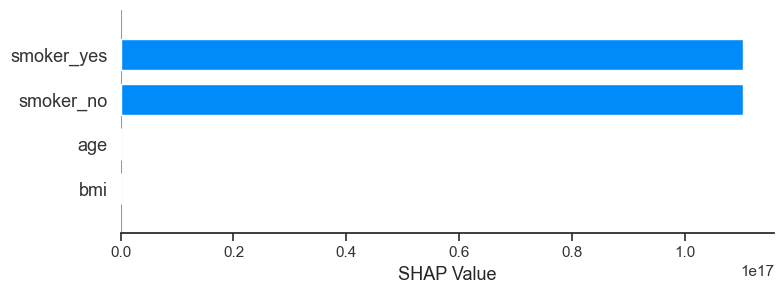

In [12]:
# Convert X_test_selected to a pandas DataFrame with appropriate column names
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_features)

# Create a shap explainer using LinearExplainer
explainer = shap.LinearExplainer(lr_model, X_test_selected_df)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_selected_df)

# Create the SHAP summary plot with x-axis as SHAP values
shap.summary_plot(shap_values, X_test_selected_df, plot_type="bar", show=False)

# Modify the x-axis to SHAP values
plt.gca().set_xlabel('SHAP Value')

# Remove legend
plt.gca().legend().remove()

# Improve picture quality (optional)
plt.tight_layout()

# Display the plot
plt.show()

#### Artificial Neural Network

ANN regression is a deep learning technique capable of modeling complex nonlinear relationships between input variables and the target variable. With its ability to learn from data and capture intricate patterns, ANN regression is particularly effective for solving problems where traditional linear regression may fall short, enabling accurate predictions and insights into complex real-world phenomena.

In [14]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define the neural network architecture
ann_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='relu', input_shape=(train_df.shape[1],)),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
ann_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
ann_model.fit(train_df, y_train, epochs=50, batch_size=8, verbose=0)

# Predict on the train set
y_train_pred = ann_model.predict(train_df)
train_r2_score = round(r2_score(y_train, y_train_pred), 2)
print(f"Train R2 Score: {train_r2_score}")

# Predict on the validation set
y_val_pred = ann_model.predict(val_df)
val_r2_score = round(r2_score(y_val, y_val_pred), 2)
print(f"Validation R2 Score: {val_r2_score}")

# Predict on the test set
y_test_pred = ann_model.predict(test_df)
test_r2_score = round(r2_score(y_test, y_test_pred), 2)
print(f"Test R2 Score: {test_r2_score}")


30/30 [==============================] - 0s 1ms/step
Train R2 Score: 0.88
7/7 [==============================] - 0s 3ms/step
Validation R2 Score: 0.85
7/7 [==============================] - 0s 3ms/step
Test R2 Score: 0.85


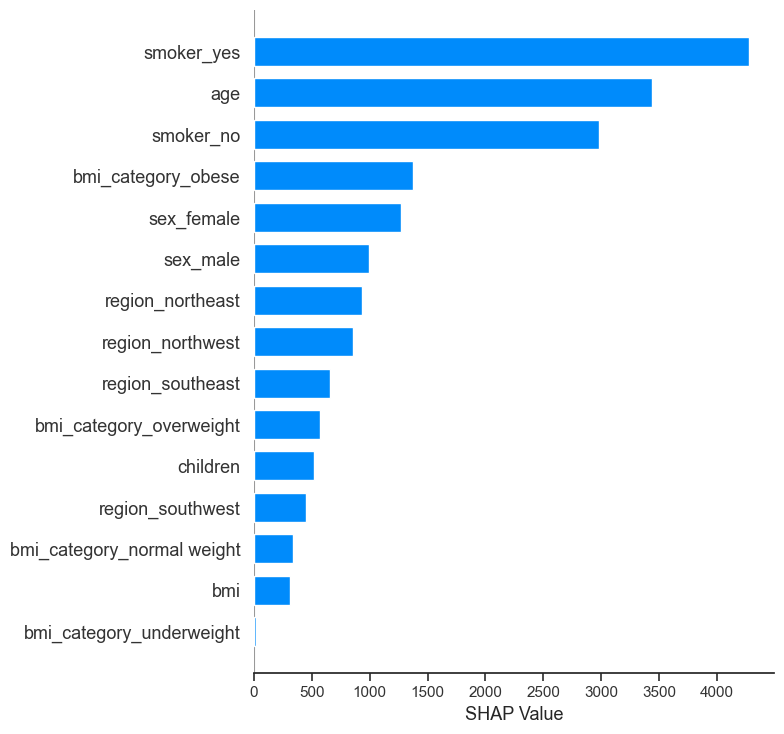

In [15]:
# Create a DeepExplainer object
explainer = shap.DeepExplainer(ann_model, train_df.values)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(test_df.values)

# Create the SHAP summary plot with x-axis as SHAP values
shap.summary_plot(shap_values, test_df, plot_type="bar", show=False)

# Modify the x-axis to SHAP values
plt.gca().set_xlabel('SHAP Value')

# Remove legend
plt.gca().legend().remove()

# Improve picture quality (optional)
plt.tight_layout()

# Display the plot
plt.show()

## 4. Conclusion

The results indicate that both the linear regression and ANN models demonstrated similar generalization capabilities. However, the ANN model exhibited better overall performance in accurately predicting insurance premiums, as reflected by a higher R2 score of 0.85 on the Test set. This suggests that the ANN model is not only accurate but also effectively captures the underlying patterns and relationships in the data, making it a preferred choice for insurance premium estimation. 
Lastly, the SHAP insights for the ANN model reveal that being a smoker or not, age, and belonging to the BMI category obese are all significant features with regards to premium prediction.